Exploratory Data Analysis (EDA)
* Load the Titanic dataset and display the first five rows.
* Identify missing values in the dataset and visualize them using a heatmap.
* What is the distribution of age in the dataset? Plot a histogram
* How many passengers survived vs. did not survive? Show this comparison using a bar plot.
* How does the survival rate vary across different classes (1st, 2nd, 3rd class)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

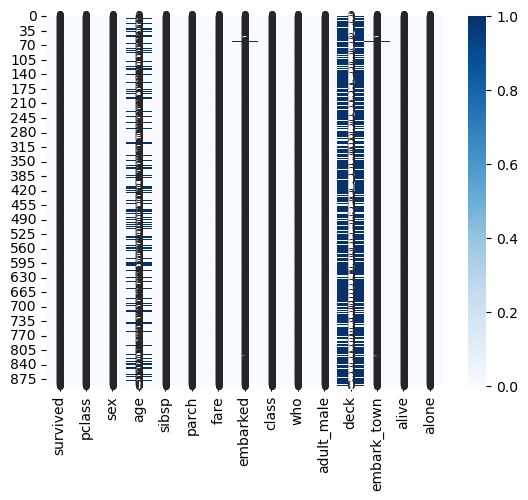

In [3]:
# Identify missing values in the dataset and visualize them using a heatmap.

sns.heatmap(df.isnull(), annot=True, cmap='Blues')

<Axes: xlabel='age', ylabel='Count'>

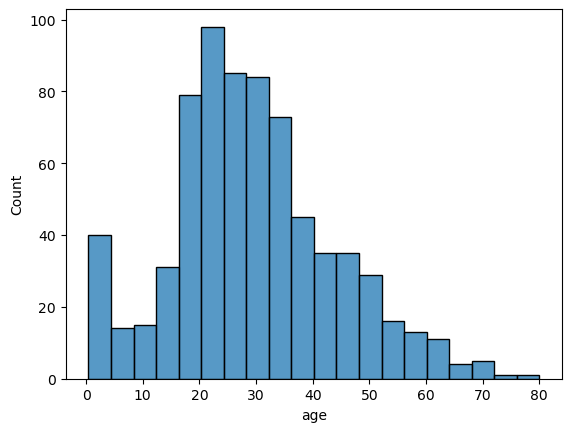

In [6]:
# What is the distribution of age in the dataset? Plot a histogram
age = df['age']
sns.histplot(age, bins=20)

In [13]:
# How many passengers survived vs. did not survive? Show this comparison using a bar plot.
survival_counts = df['survived'].value_counts()
survival_counts

survived
0    549
1    342
Name: count, dtype: int64

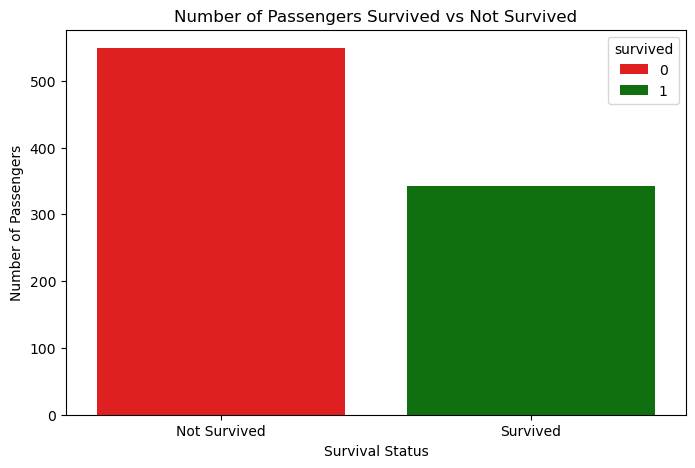

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_counts.index, y=survival_counts.values,hue= survival_counts.index,  palette=['red', 'green'])

plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Survived vs Not Survived')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()


In [ ]:
#  How does the survival rate vary across different classes (1st, 2nd, 3rd class)?
survival_class = df.groupby('pclass')['survived'].mean()
survival_class

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

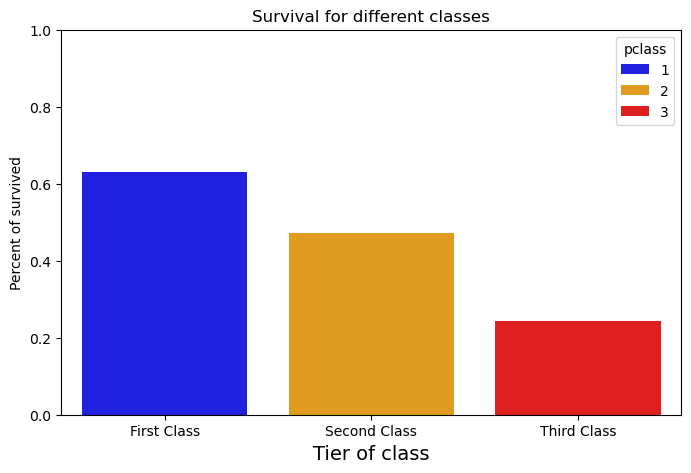

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x=survival_class.index, y = survival_class.values,hue=survival_class.index, palette=['blue', 'orange', 'red'])

plt.title('Survival for different classes')
plt.ylabel("Percent of survived")
plt.xlabel("Tier of class", fontsize= 14)
plt.xticks(ticks=[0,1,2], labels=['First Class', 'Second Class', 'Third Class'])
plt.ylim(0,1)
plt.show()

Data Visualization using Matplotlib
* Plot a line graph showing the trend of ticket fare across different passenger classes.
* Create a scatter plot between age and fare to check if older passengers paid higher fares.
* Use subplots to show a boxplot of age, fare, and sibsp (siblings/spouses aboard) to detect outliers.
* Create a pie chart showing the distribution of embarked passengers from different ports (Embarked).
* Create a histogram to display the distribution of passenger fares.

In [30]:
# Plot a line graph showing the trend of ticket fare across different passenger classes.

fares_class= df.groupby('pclass')['fare'].mean()
fares_class

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

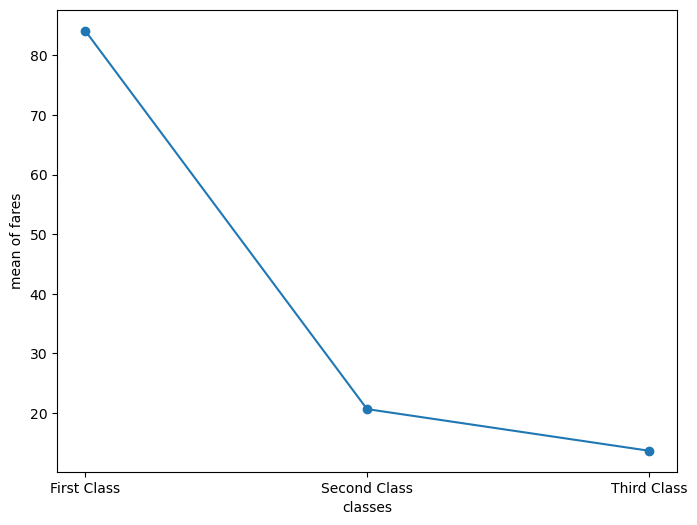

In [36]:
plt.figure(figsize=(8,6))
plt.plot(fares_class, marker='o')
plt.xlabel('classes')
plt.ylabel('mean of fares')
plt.xticks(ticks=[1, 2, 3], labels=['First Class', 'Second Class', 'Third Class']);

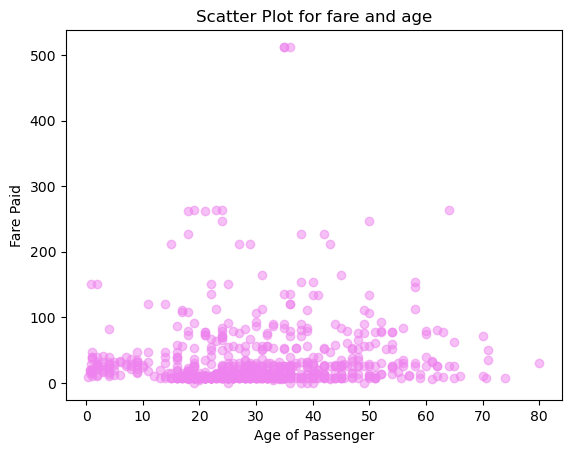

In [38]:
# Create a scatter plot between age and fare to check if older passengers paid higher fares.
titanic = df.dropna(subset=['age', 'fare'])

plt.figure(figure=(8,5))
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, color='violet')
plt.xlabel('Age of Passenger')
plt.ylabel('Fare Paid')
plt.title('Scatter Plot for fare and age')
plt.show()

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_59283/1531456210.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(titanic[val], labels=[val])
/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_59283/1531456210.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(titanic[val], labels=[val])
/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_59283/1531456210.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(titanic[val], labels=[val])


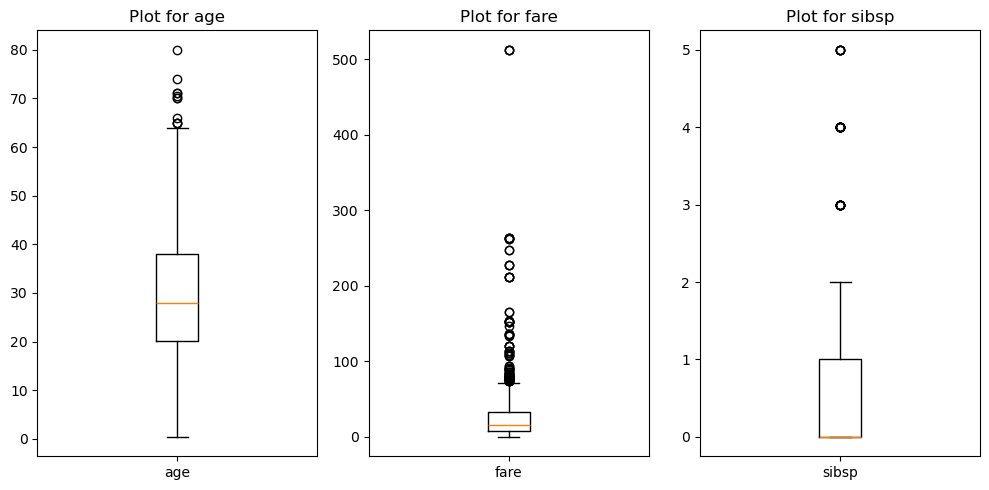

In [46]:
# Use subplots to show a boxplot of age, fare, and sibsp (siblings/spouses aboard) to detect outliers.
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

features = ['age', 'fare',  'sibsp']

for i, val in enumerate(features):
    axes[i].boxplot(titanic[val], labels=[val])
    axes[i].set_title(f'Plot for {val}')

plt.tight_layout()
plt.show()
    

In [ ]:
# Create a pie chart showing the distribution of embarked passengers from different ports (Embarked).
embarked = titanic['embarked'].value_counts()
embarked

embarked
S    554
C    130
Q     28
Name: count, dtype: int64

Text(0.5, 1.0, 'Pie chart for distribution of embarked')

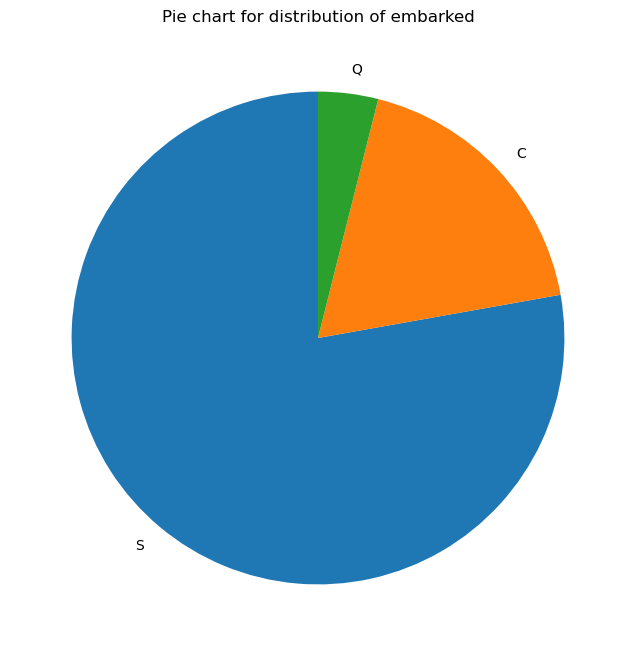

In [53]:
plt.figure(figsize=(8,8))
plt.pie(embarked, labels=embarked.index, startangle=90)
plt.title("Pie chart for distribution of embarked")

Text(0.5, 0, 'Fare charge')

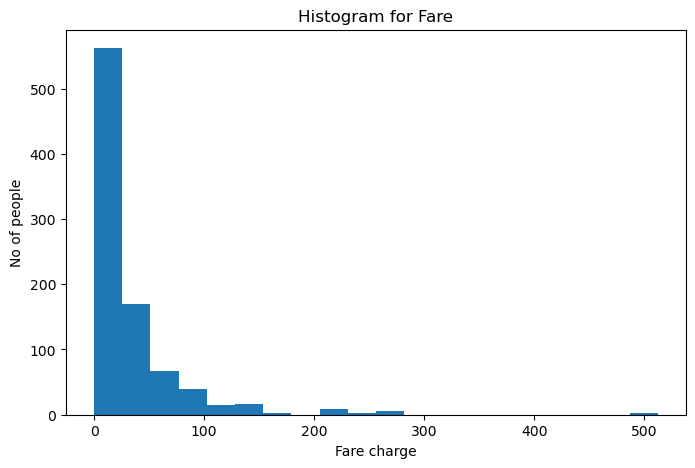

In [55]:
# Create a histogram to display the distribution of passenger fares.

plt.figure(figsize=(8,5))
plt.hist(df['fare'], bins=20)
plt.title("Histogram for Fare")
plt.ylabel('No of people')
plt.xlabel("Fare charge")

Data Visualization using Seaborn
* Use seaborn’s countplot to show the number of males and females in the dataset.
* Create a violin plot showing the distribution of age across different passenger classes.
* Use kdeplot to show the density distribution of fare.
* Create a pair plot using age, fare, pclass, and survived to observe relationships between numerical variables.
* Use a heatmap to visualize the correlation between numerical features.

In [ ]:
# Use seaborn’s countplot to show the number of males and females in the dataset.

sex
male      577
female    314
Name: count, dtype: int64

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_59283/540170412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=titanic, palette=['blue', 'pink'])


Text(0, 0.5, 'no of people')

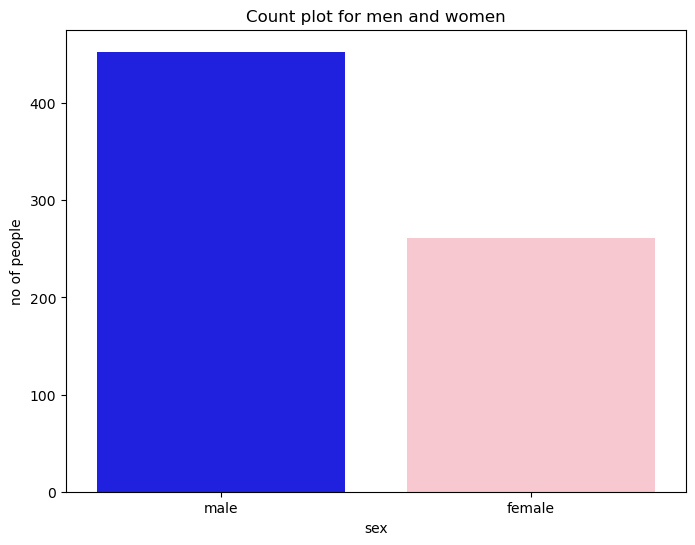

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=titanic, palette=['blue', 'pink'])
plt.title("Count plot for men and women")
plt.xlabel("sex")
plt.ylabel('no of people')

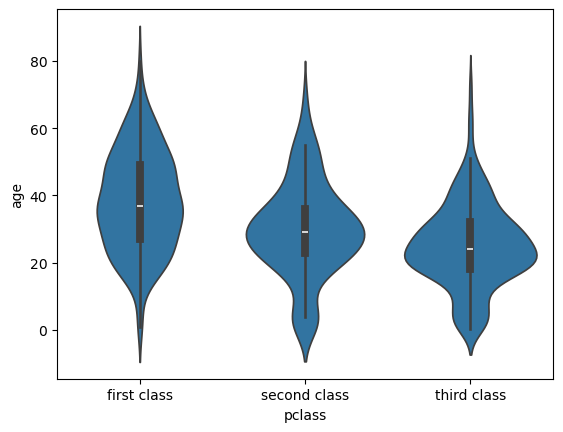

In [66]:
# Create a violin plot showing the distribution of age across different passenger classes.
sns.violinplot(x='pclass',y ='age',  data = titanic)
plt.xticks(ticks=[0,1,2], labels=['first class', 'second class', 'third class']);

<Axes: xlabel='fare', ylabel='Density'>

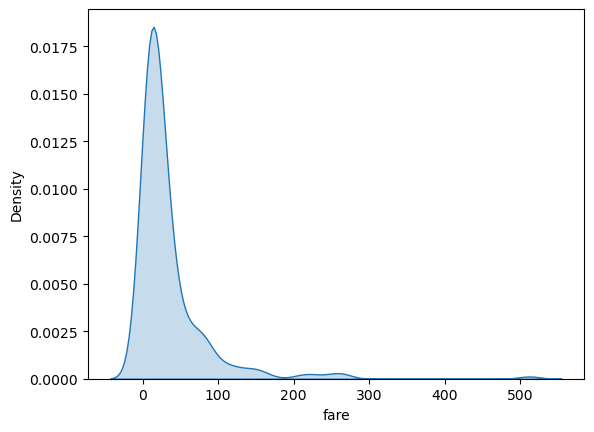

In [68]:
# Use kdeplot to show the density distribution of fare.
sns.kdeplot(data=titanic, x='fare', fill=True)

Text(0.5, 1.0, 'Pair plot for numerical variables')

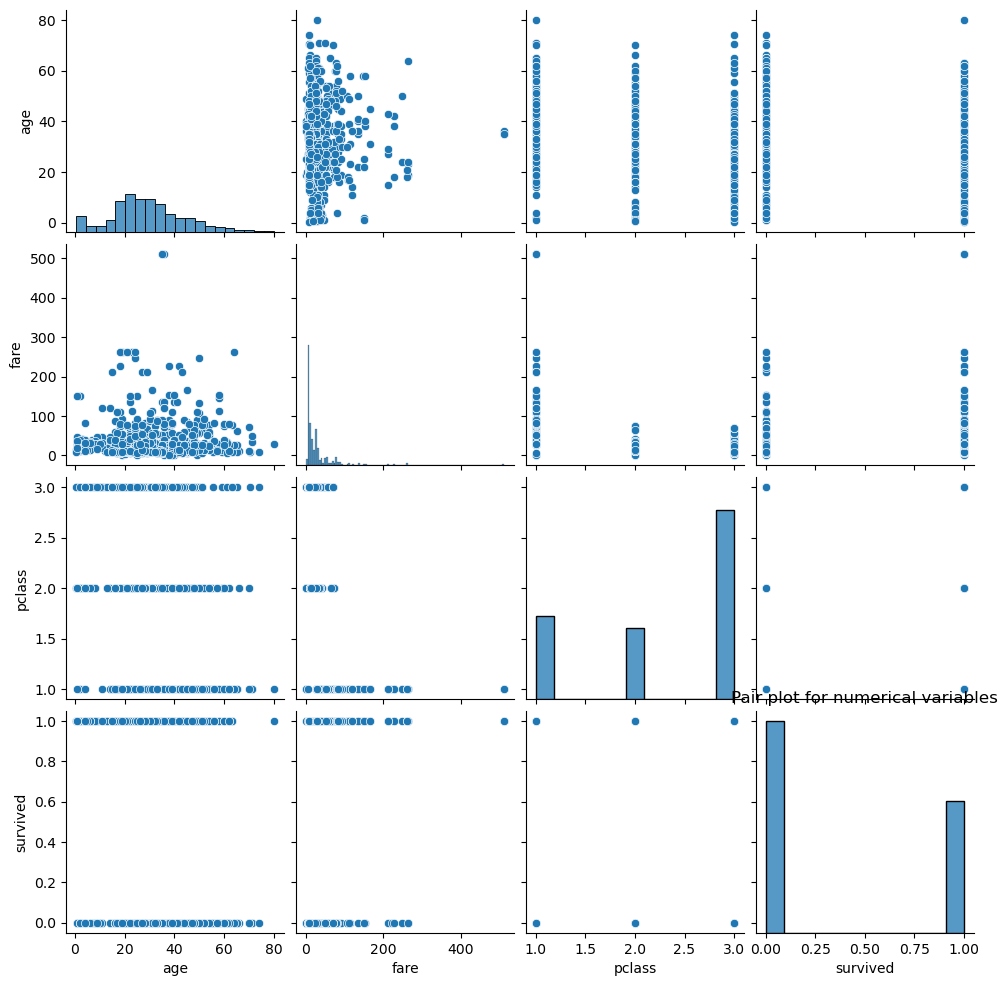

In [71]:
# Create a pair plot using age, fare, pclass, and survived to observe relationships between numerical variables.
features = ['age', 'fare', 'pclass',  'survived' ]
sns.pairplot(data=df[features] )
plt.title("Pair plot for numerical variables")

<Axes: >

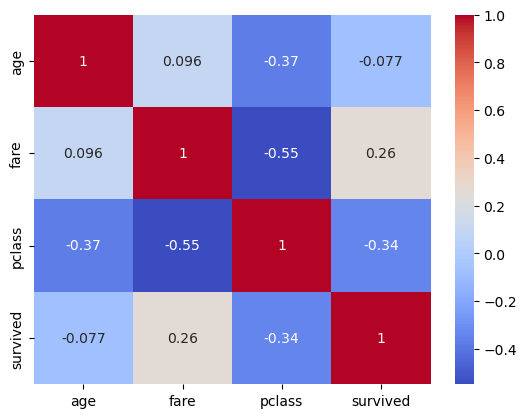

In [76]:
# Use a heatmap to visualize the correlation between numerical features.

corr_df = df[features].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

Summary Statistics
* Write a function to calculate the mean, median, mode, standard deviation, and variance of numerical features.
* What is the skewness and kurtosis of the fare column? Compute these values manually and compare them with scipy.stats.skew() and scipy.stats.kurtosis().
* Identify whether the age column has a normal distribution by checking its skewness and kurtosis.
* Find the minimum, maximum, and range of the fare column.
* Compare the median and mean of the age column. If they are significantly different, what does that indicate about the distribution?

In [81]:


titanic['age'].fillna(np.mean(df['age']))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

In [84]:
# Write a function to calculate the mean, median, mode, standard deviation, and variance of numerical features.
from scipy import stats

def calculate_summary_statistics(df):
    stati = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        stati[col] = {
            "Mean": np.mean(df[col]),
            "Median": np.median(df[col]), 
            "Mode": stats.mode(df[col], keepdims=True)[0][0],
            "Standard Deviation": np.std(df[col]), 
            "Variance": np.var(df[col])
            }
    return pd.DataFrame(stati)

calculate_summary_statistics(titanic)



,survived,pclass,age,sibsp,parch,fare
Mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
Median,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
Mode,0.000000,3.000000,24.000000,0.000000,0.000000,13.000000
Standard Deviation,0.491116,0.837663,14.516321,0.929132,0.852692,52.881858
Variance,0.241195,0.701679,210.723580,0.863286,0.727083,2796.490952


In [85]:
# What is the skewness and kurtosis of the fare column? Compute these values manually and compare them with scipy.stats.skew() and scipy.stats.kurtosis().

fare = titanic['fare'].dropna()

mean_fare = np.mean(fare)
std_fare = np.std(fare, ddof=0)
n = len(fare)

skew_numerator = np.sum((fare - mean_fare) ** 3)/n
skew_deno = (np.sum((fare - mean_fare) ** 2) / n) ** (3/2)
manual_skew = skew_numerator / skew_deno

kurto_numerator = np.sum((fare - mean_fare)** 4)/ n
kurto_deno = (np.sum((fare - mean_fare) ** 2) / n) ** 2
manual_kurto = (kurto_numerator/kurto_deno) - 3

scipy_skew = stats.skew(fare)
scipy_kurto = stats.kurtosis(fare)

print(f"Manual Skew: {manual_skew}")
print(f"Manual kurtosis: {manual_kurto}")
print(f"Scipy Skew: {scipy_skew}")
print(f"Scipy kurtosis: {scipy_kurto}")

Manual Skew: 4.643848122581354
Manual kurtosis: 30.699725237041868
Scipy Skew: 4.643848122581354
Scipy kurtosis: 30.699725237041868


In [86]:
# Identify whether the age column has a normal distribution by checking its skewness and kurtosis.

age = df['age'].dropna()

age_skew = stats.skew(age)
age_kurto = stats.kurtosis(age)

print('Skewness: ', age_skew)
print('Kurtosis: ', age_kurto)

Skewness:  0.3882898514698657
Kurtosis:  0.16863657224286044


In [88]:
# Find the minimum, maximum, and range of the fare column.

min_ = np.min(fare)
max_ = np.max(fare)
range_ = max_ - min_

print('Minimum: ', min_)
print('Maximum: ', max_)
print('Range: ', range_)

Minimum:  0.0
Maximum:  512.3292
Range:  512.3292


In [89]:
# Compare the median and mean of the age column. If they are significantly different, what does that indicate about the distribution?
mean_ = np.mean(age)
median_ = np.median(age)

print('Mean', mean_)
print('Median', median_)

Mean 29.69911764705882
Median 28.0


Correlation Analysis
* Compute the Pearson correlation coefficient between fare and age. Interpret the result.
* Compute the Spearman correlation between fare and pclass. What does the result indicate?
* Identify which numerical features are highly correlated with the target variable survived.
* Visualize the correlation matrix using a heatmap and interpret the relationships.
* Is there a strong correlation between sibsp and parch? Verify using a correlation coefficient.

In [94]:
# Compute the Pearson correlation coefficient between fare and age. Interpret the result.\

titanic_clean = titanic[['fare', 'age']].dropna()

pearson_corr, _ = stats.pearsonr(titanic_clean['age'], titanic_clean['fare'])

print(f"Pearson Correlation Coefficient: {pearson_corr}")

Pearson Correlation Coefficient: 0.09606669176903908


In [95]:
# Compute the Spearman correlation between fare and pclass. What does the result indicate?

df_corr = df[['fare', 'pclass']].dropna()

corr_fare_class, _ = stats.spearmanr(df_corr['fare'], df_corr['pclass'])

corr_fare_class

-0.6880316726256098

In [96]:
# Identify which numerical features are highly correlated with the target variable survived.

df_numerical = df.select_dtypes(include=[np.number]).dropna()

df_corr = df_numerical.corr()

df_corr

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


Text(0.5, 1.0, 'Heatmap for Correlation Matrix')

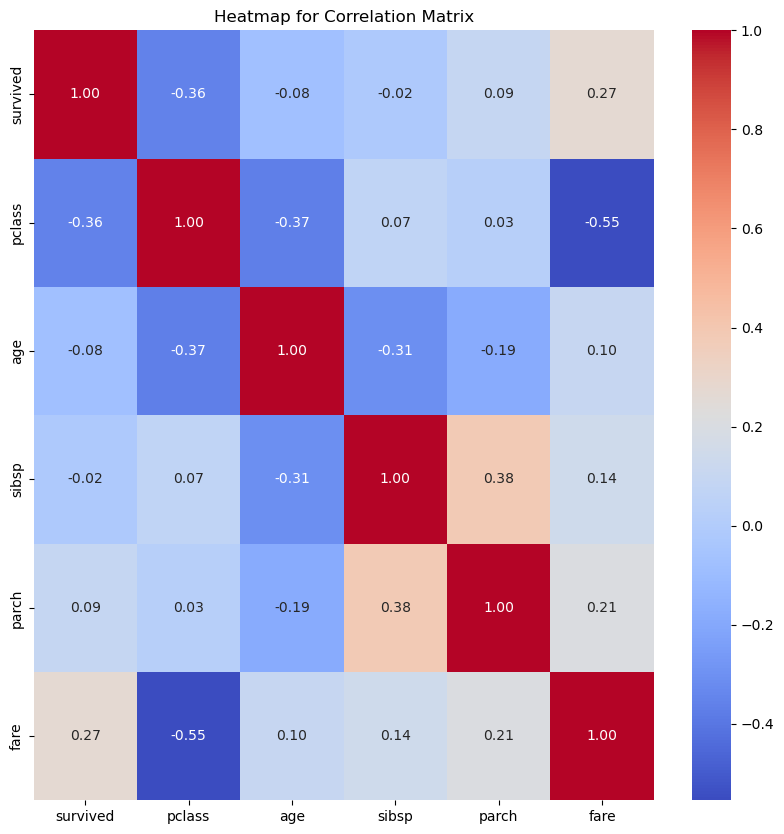

In [99]:
# Visualize the correlation matrix using a heatmap and interpret the relationships.

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap for Correlation Matrix')

In [102]:
# Is there a strong correlation between sibsp and parch? Verify using a correlation coefficient.

corr_sib_parch = np.corrcoef(titanic['sibsp'], titanic['parch'])[0,1]
corr_sib_parch

0.38381986404283336

Covariance Analysis
* Compute the covariance between fare and age. What does the sign of the covariance indicate?
* Compute the covariance matrix for all numerical variables and interpret one or two key findings.
* Compare correlation and covariance—how do they differ in measuring relationships between numerical features?
* Does fare have a higher covariance with pclass or age? Why do you think that is?
* If we scale all numerical variables using Min-Max Scaling, will covariance values remain the same? Explain why or why not.

In [104]:
# Compute the covariance between fare and age. What does the sign of the covariance indicate?

df_fare_age = df[['fare', 'age']].dropna()

covariance = np.cov(df_fare_age['age'], df_fare_age['fare'])[0][1]
covariance

73.84902981461929

In [106]:
# Compute the covariance matrix for all numerical variables and interpret one or two key findings.
cov_df = df_numerical.cov()

cov_df

,survived,pclass,age,sibsp,parch,fare
survived,0.241533,-0.148165,-0.551296,-0.007932,0.039133,6.974923
pclass,-0.148165,0.702663,-4.496004,0.052412,0.018370,-24.583138
age,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
sibsp,-0.007932,0.052412,-4.163334,0.864497,0.304513,6.806212
parch,0.039133,0.018370,-2.344191,0.304513,0.728103,9.262176
fare,6.974923,-24.583138,73.849030,6.806212,9.262176,2800.413100


<Axes: >

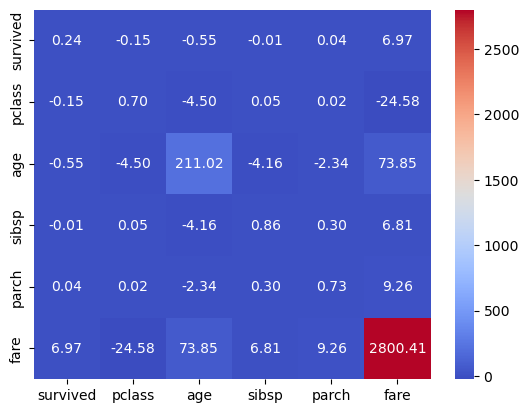

In [107]:
sns.heatmap(cov_df, annot=True, fmt='.2f', cmap='coolwarm')

In [110]:
# Compare correlation and covariance—how do they differ in measuring relationships between numerical features?
covariance = np.cov(fare, age)[0, 1]
correlation = np.corrcoef(fare, age)[0, 1]

print("Correlation: ", correlation)
print("Covariance: ", covariance)

Correlation:  0.09606669176903894
Covariance:  73.84902981461929


In [113]:
# Does fare have a higher covariance with pclass or age? Why do you think that is?
pclass = df['pclass'].iloc[fare.index]  # Align pclass with the index of fare

cov_fare_pclass = np.cov(fare, pclass)[0, 1]
cov_fare_age = np.cov(fare, age)[0, 1]

print("Covariance of fare and pclass: ", cov_fare_pclass)
print("Covariance of fare and age: ", cov_fare_age)

Covariance of fare and pclass:  -24.58313838281456
Covariance of fare and age:  73.84902981461929


In [ ]:
# If we scale all numerical variables using Min-Max Scaling, will covariance values remain the same? Explain why or why not.
